# Setup
Install dependencies using ```requirements.txt```  
```matplotlib```, ```numpy```, ```pandas```, ```ray```, ```scikit-learn```, ```scipy```, and ```torch``` are required.

# Import modules

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from userkit.interface import UserInterface

# Load models using ```UserInterface``` class
### Currently (13th June, 2023), trained models are as follows:
#### 20Hz Base
  * models/20hz_Fx.pt
  * models/20hz_Fy.pt
  * models/20hz_Fz.pt
  * models/20hz_Mx.pt
  * models/20hz_My.pt
  * models/20hz_Mz.pt
#### 100Hz Base
  * models/100hz_Fx.pt
  * models/100hz_Fy.pt
  * models/100hz_Fz.pt
  * models/100hz_Mx.pt
  * models/100hz_My.pt
  * models/100hz_Mz.pt

In [10]:
freqs = [100]
outs = ["Fx", "Fy", "Fz", "Mx", "My", "Mz"]
models = {}
for f in freqs:
    for o in outs:
        name = f"{f}hz_{o}"  # 100hz_Fx
        models[name] = UserInterface(f"models/{name}.pt", use_gpu=False)

<class 'architectures.convlstm.ConvLSTM'> instance from models/100hz_Fx.pt
Sampling rate: 100 Hz
Input shape: (N,C=9,L=115)
Input: ['imu_x_linacc', 'pos_yaw', 'imu_pitch', 'hydraulic_pressure', 'pos_pitch', 'pos_roll', 'diffp_j2', 'diffp_j1', 'pos_y']
Output: ['Fx']

<class 'architectures.convlstm.ConvLSTM'> instance from models/100hz_Fy.pt
Sampling rate: 100 Hz
Input shape: (N,C=12,L=80)
Input: ['pos_yaw', 'pos_roll', 'imu_pitch', 'pos_pitch', 'imu_x_linacc', 'imu_yaw_angvel', 'diffp_j1', 'pos_y', 'pos_x', 'pos_z', 'depth', 'imu_z_linacc']
Output: ['Fy']

<class 'architectures.convlstm.ConvLSTM'> instance from models/100hz_Fz.pt
Sampling rate: 100 Hz
Input shape: (N,C=15,L=122)
Input: ['imu_roll', 'diffp_j3', 'imu_yaw', 'pos_x', 'diffp_j4', 'pos_z', 'depth', 'imu_pitch_angvel', 'hydraulic_pressure', 'imu_roll_angvel', 'diffp_j1', 'imu_yaw_angvel', 'imu_z_linacc', 'imu_y_linacc', 'diffp_j2']
Output: ['Fz']

<class 'architectures.convlstm.ConvLSTM'> instance from models/100hz_Mx.pt
Samp

/root/files_to_kriso/kriso_230613/architectures/blocks.py:68: UserWarning: Timesteps are being over-pooled: 59->81
  warnings.warn(
/root/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1425062187613439 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/root/files_to_kriso/kriso_230613/architectures/blocks.py:68: UserWarning: Timesteps are being over-pooled: 26->35
  warnings.warn(
/root/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/modules/rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25670488909179423 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/root/files_to_kriso/kriso_230613/architectures/blocks.py:68: Use

# Define ```key``` to select from ```models``` dictionary

In [11]:
key = "100hz_Fx"

# Create arbitrary input data for demo
**Set initial time values to zero.**  
Input tensor $\mathbb{I}\in\mathbb{R}^{N\times C\times L}$  
Output tensor $\mathbb{O}\in\mathbb{R}^{N\times 1}$  

$N\to$ Batch size  
$C\to$ Channels (Input features) in order of ```models[key].model_info["input_columns"]``` from index 0 to $C-1$  
$L\to$ Sequence length (Time steps) in order of $[t_i,t_{i+1},\cdots,t_{i+L-1}]$ from index 0 to $L-1$


In [12]:
C = len(models[key].model_info["input_columns"])
L = models[key].model_info["input_timesteps"]
input_data = torch.rand(1, C, L)
# input_data=input_data.unsqueeze(0)

# Predict using ```UserInterface.predict``` method

In [13]:
out = models[key].predict(input_data)
print(out)

tensor([[121.2355]])


# Misc.

<!-- ### Visualizing predictions
#### Arguments
```dataset_type``` Determines which type of data will be predicted and visualized. Supports one of ```['train', 'valid', 'test']```  
```show_ani_input``` and ```show_ani_output``` Setting to ```True``` will show animated input/output figures.   -->

<!-- * Video files will be saved at ```figures``` directory.   -->
<!-- * ```pip install ipympl``` if you're using Visual Studio Code. -->
<!-- * Running this feature requires ```ffmpeg``` to be installed.  
  For Linux environment, run
  ```
  sudo apt install ffmpeg
  ```
  For else, [download executable](https://ffmpeg.org/download.html) and install. -->




### Visualizing model training history
Note that signs of some metrics are reversed. **Lower is better for all.**  

```spearmanr``` $-1\times$[Spearman correlation coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) $\in[-1,1]$  
```corrcoef``` $-1\times$[Pearson correlation coefficient](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) $\in[-1,1]$  
```r2``` $-1\times$[Coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) $\in [-1,\inf]$  
```rms``` Relative RMS error $\frac{\vert \sqrt{(Y^{label})^2}-\sqrt{(Y^{pred})^2} \vert}{\sqrt{(Y^{label})^2}}\times 100\in[0,\inf]$  
```peaktopeak``` Peak-to-Peak error $\frac{(\max{Y^{label}}-\min{Y^{label}})-(\max{Y^{pred}}-\min{Y^{pred}})}{\max{Y^{label}}-\min{Y^{label}}}\times 100$ $\in[0,\inf]$  
```unscaled_mse``` MSE in raw data scale $\in[0,\inf]$  
```rel_meanerr``` Relative mean value error $\frac{\bar{Y^{label}}-\bar{Y^{pred}}}{\bar{Y^{label}}}\times 100 \in[0,\inf]$  
```model_best_metric``` Observed criteria for selecting the best model during training. Defaults to ```corrcoef```

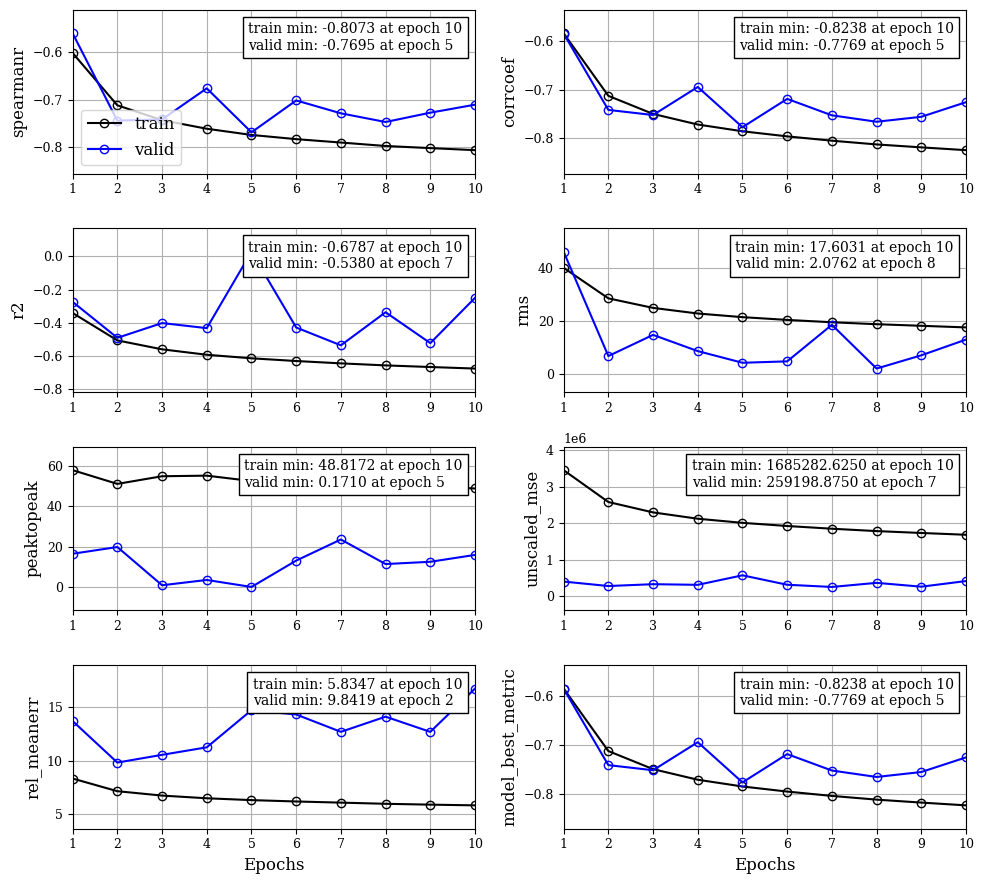

In [14]:
models[key].show_history()

### Printing model specifications
Hyperparameters and training configurations are stored at ```UserInterface.model_info```

In [15]:
_ = [print(f"{k}:{v}") for k, v in models[name].model_info.items()]

__class__:<class 'architectures.convlstm.ConvLSTM'>
batch_size:16
cnn_activation:selu
cnn_blocks:3
cnn_kernel_size:3
cnn_stride:2
epochs:10
initial_lr:0.001113945835415529
input_columns:['diffp_j3', 'pos_x', 'imu_yaw', 'imu_roll', 'depth', 'pos_z', 'diffp_j4', 'imu_roll_angvel', 'imu_yaw_angvel', 'imu_pitch_angvel', 'imu_z_linacc', 'imu_y_linacc', 'hydraulic_pressure', 'pos_y', 'pos_roll']
input_timesteps:63
linear_activation:selu
linear_layers:1
linear_states:142
loss_fn:mse
lr_halflife:9999
multioptim:False
optim_alg:radam
output_columns:['Mz']
reg_lambda:0.0017548694343420036
report_ray:False
rnn_bidirectional:True
rnn_dropout:0.19622895544822724
rnn_h_init:zeros
rnn_layers:4
rnn_states:50
sampling_rate:100
save_filename:100hz_Mz
shuffle_train:True
valid_metric:corrcoef
